In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

# P6
Utilizando CAMB, trace la evolución de los parámetros de densidad para la materia, la radiación, la energía oscura y la curvatura.

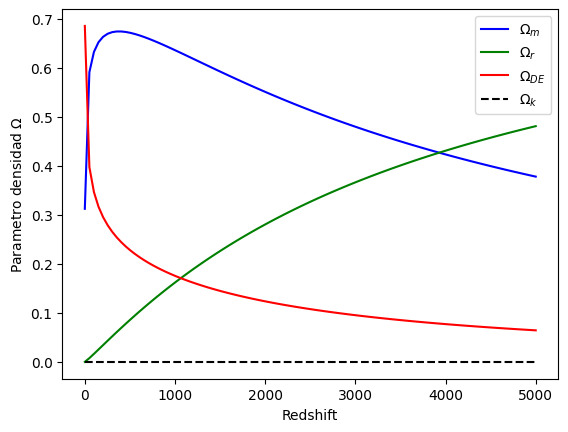

In [14]:
#parametros cosmologicos:

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

pars = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
result = camb.get_results(pars)
z = np.linspace(0,5000,100)

#Radicacion: fotones + neutrinos
omega_r = result.get_Omega('photon',z) + result.get_Omega('neutrino',z)

#Materia: cold dark matter + bariones
omega_m = result.get_Omega('cdm',z) + result.get_Omega('baryon',z)

#Energia oscura
omega_de = result.get_Omega('de',z) 

#Curvatura
omega_k = result.get_Omega('K',z) 


plt.plot (z , omega_m , label = r'$\Omega_m$', color = "b")
plt.plot (z , omega_r , label =r'$\Omega_r$', color ="g")
plt.plot (z , omega_de , label =r'$\Omega_{DE}$', color ="r")
plt.plot (z , omega_k , label =r'$\Omega_k$', color ="k", linestyle ="--")

plt.xlabel ("Redshift")
plt.ylabel ("Parametro densidad "+ r'$\Omega$')
plt.legend()
plt.show ()

# P7
Usamos z pequeños por lo que es despreciable el parametro de densidad de la radiacion.

C:\Users\jorge\AppData\Local\Temp\ipykernel_32664\2363213273.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(w_m*((1 + z)**3) + w_k*((1 + z)**2) + w_lambda)
C:\Users\jorge\AppData\Local\Temp\ipykernel_32664\2363213273.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, err = quad(lambda x: 1/E(x, w_m, w_lambda), 0, z)
C:\Users\jorge\AppData\Local\Temp\ipykernel_32664\2363213273.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be us

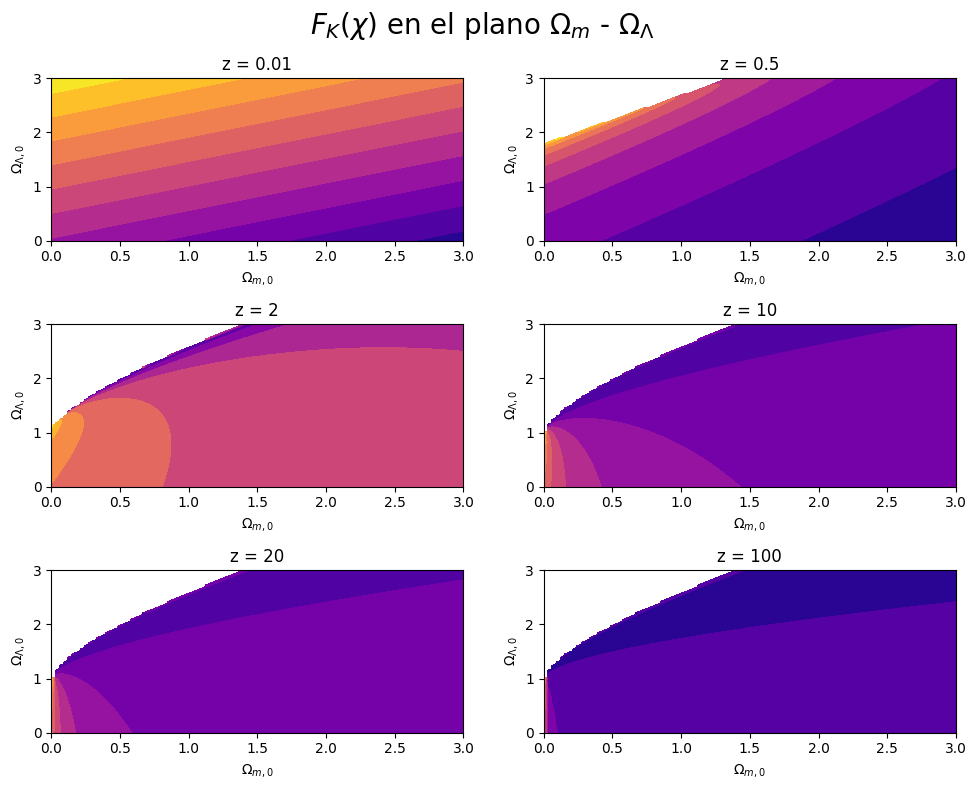

In [55]:
from scipy.integrate import quad

# Parametros
H0 = 67.4  # km/s/Mpc
c = 3e5  # km/s

# E=H(z)/H_0
def E(z, w_m, w_lambda):
    w_k = 1 - w_m - w_lambda
    return np.sqrt(w_m*((1 + z)**3) + w_k*((1 + z)**2) + w_lambda)

def f1(z, w_k, w_m, w_lambda):
    integral, err = quad(lambda x: 1/E(x, w_m, w_lambda), 0, z)
    return (c / (H0 * np.sqrt(w_k)))*np.sinh(np.sqrt(w_k)*integral)

def f2(z, w_m, w_lambda):
    integral, err = quad(lambda x: 1/E(x, w_m, w_lambda), 0, z)
    return (c / H0)*integral

def f3(z, w_k, w_m, w_lambda):
    integral, err = quad(lambda x: 1/E(x, w_m, w_lambda), 0, z)
    return (c / (H0 * np.sqrt(-w_k))) * np.sin(np.sqrt(-w_k)*integral)

# Valores
vect_z = [0.01 , 0.5 , 2, 10, 20 , 100]
vect_w_m = np.linspace(0, 3, 100)
vect_w_lambda = np.linspace(0, 3, 100)
W_m, W_lambda = np.meshgrid(vect_w_m, vect_w_lambda)


#creamos figura y ejes
fig, axes = plt.subplots(3,2, figsize=(10,8))

# para los z
for k,z in enumerate(vect_z):
    k = k+1
    if k % 2 == 0:
        y = 1
    else:
        y = 0
    x = int(k // 2.1)
    Fk = np.zeros_like(W_m)

    for i in range(len(vect_w_m)):
        for j in range(len(vect_w_lambda)):
            w_m = W_m[i, j]
            w_Lambda = W_lambda[i, j]
            w_k = 1 - w_m - w_Lambda
            
            if w_k > 0:
                Fk[i, j] = f1(z, w_k, w_m, w_Lambda)
            elif w_k == 0:
                Fk[i, j] = f2(z, w_m, w_Lambda)
            else:
                Fk[i, j] = f3(z, w_k, w_m, w_Lambda)
                
    axes[x,y].contourf(W_m, W_lambda, Fk,  levels =10, cmap = 'plasma' )
    axes[x,y].set_xlabel(r'$\Omega_{m,0}$')
    axes[x,y].set_ylabel(r'$\Omega_{\Lambda,0}$')
    axes[x,y].set_title('z = '+ f'{z}')

fig.subplots_adjust(top=10)  #Ajusta el titulo para que no choque con los graficos
fig.suptitle(r'$F_K(\chi)$ en el plano $\Omega_m$ - $\Omega_{\Lambda} $', fontsize=20) #pone titulo a la figura
plt.tight_layout()
plt.show()

